# GRIP @The Sparks Foundation

# Savita Balabhadrapatruni

**Task No. 6 - Prediction using Decision Tree Algorithm**

**Purpose of this task is to create and visualize the decision tree classifier graphically so that the algorithm classifies any new data fed to it to the right class**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import tree

In [2]:
import warnings

#Ignoring the warning messages

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#As ID column is not required; lets drop the column 'ID'

df=df.drop(['Id'],axis=1)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.duplicated().sum()

3

In [9]:
#We can dropoff the duplicated rows

df=df.drop_duplicates()

In [10]:
df.shape

(147, 5)

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**As we see the data is ready; we can carry the Exploratory Data Analysis**

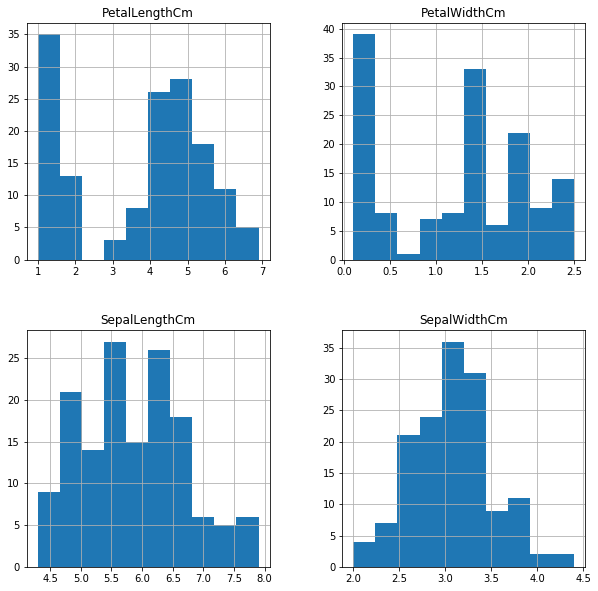

In [13]:
#HISTOGRAM

df.hist(figsize=(10,10))
plt.show()

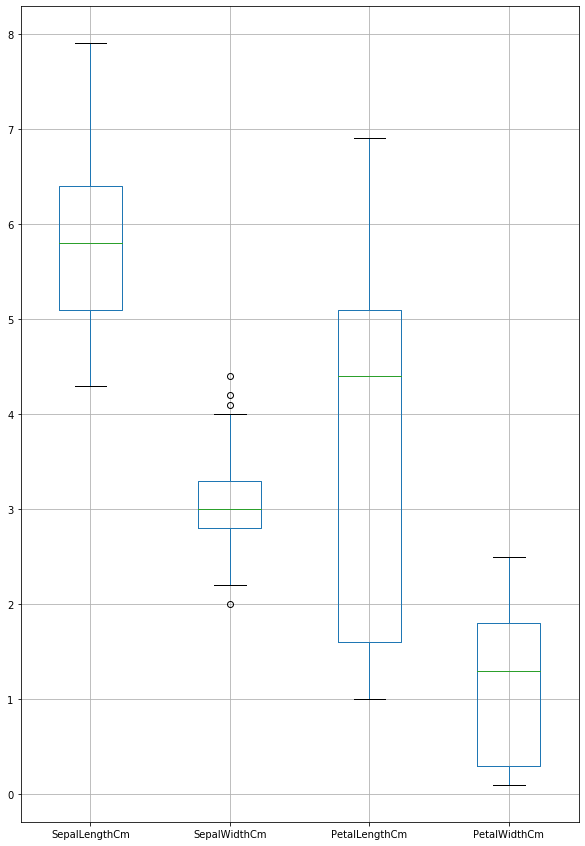

In [14]:
#BOXPLOT

df.boxplot(figsize=(10,15))
plt.show()

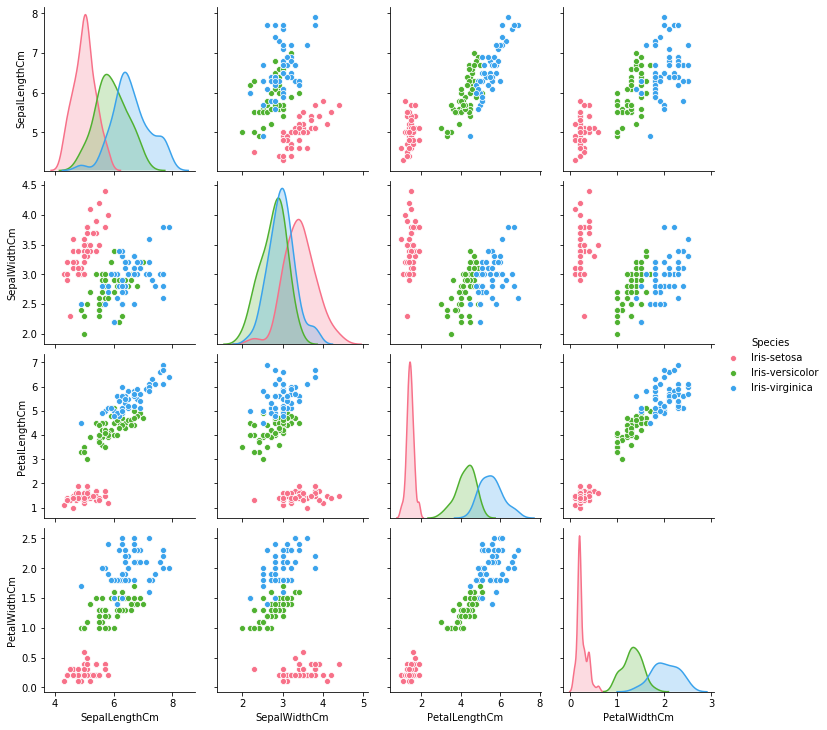

In [15]:
sns.pairplot(df, hue = 'Species',palette='husl')
plt.show()

It can be seen that one (Iris Setosa) of the three clusters is distinctively clustered. Let us proceed clustering the species.

In [16]:
correlation=df.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


The columns 'Petal Width' and 'Petal Length' are highly correlated

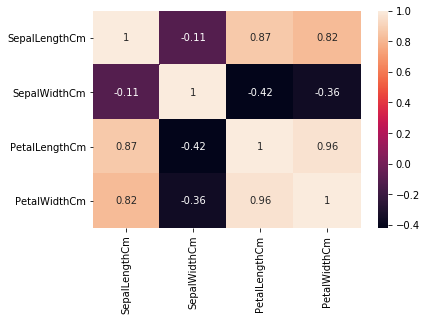

In [17]:
sns.heatmap(correlation, annot = True)

Label Encoding the label - 'Species' column. 

In [18]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

As can be seen above - Petal width and Petal Length are highly correlated
&& 
Petal Length and Sepal Width are least correlated (not related at all)

In [19]:
dfy=df['Species']
dfx = df.drop(['Species'],axis=1)

In [20]:
y=dfy.values
x=dfx.values

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini',max_depth = 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
ypred = model.predict(x_test)

In [24]:
from sklearn import metrics

metrics.accuracy_score(y_test, ypred)

0.9666666666666667

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
confusion_matrix(y_test,ypred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]], dtype=int64)

In [27]:
ref_model = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy'],
              'max_depth': [2, 3, 5, 10]
             }

In [28]:
from sklearn.model_selection import GridSearchCV

grid_obj = GridSearchCV(ref_model, parameters, scoring='accuracy')
grid_obj = grid_obj.fit(x_train, y_train)

In [29]:
model1=grid_obj.best_estimator_

reg=model1.fit(x_train, y_train)

model1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
reg.score(x_test,y_test)

0.9666666666666667

In [34]:
clf=DecisionTreeClassifier(random_state=0,max_depth=3,criterion='gini')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [35]:
feature_names = ['Sepal length (cm)','Sepal width (cm)','Petal length (cm)','Petal width (cm)']
class_names = ['setosa', 'versicolor', 'virginica']

[Text(523.125, 951.3000000000001, 'Petal width (cm) <= 0.8\ngini = 0.666\nsamples = 117\nvalue = [37, 40, 40]\nclass = versicolor'),
 Text(348.75, 679.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(697.5, 679.5, 'Petal width (cm) <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(348.75, 407.70000000000005, 'Petal length (cm) <= 5.35\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]\nclass = versicolor'),
 Text(174.375, 135.89999999999998, 'gini = 0.093\nsamples = 41\nvalue = [0, 39, 2]\nclass = versicolor'),
 Text(523.125, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(1046.25, 407.70000000000005, 'Petal length (cm) <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(871.875, 135.89999999999998, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(1220.625, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = 

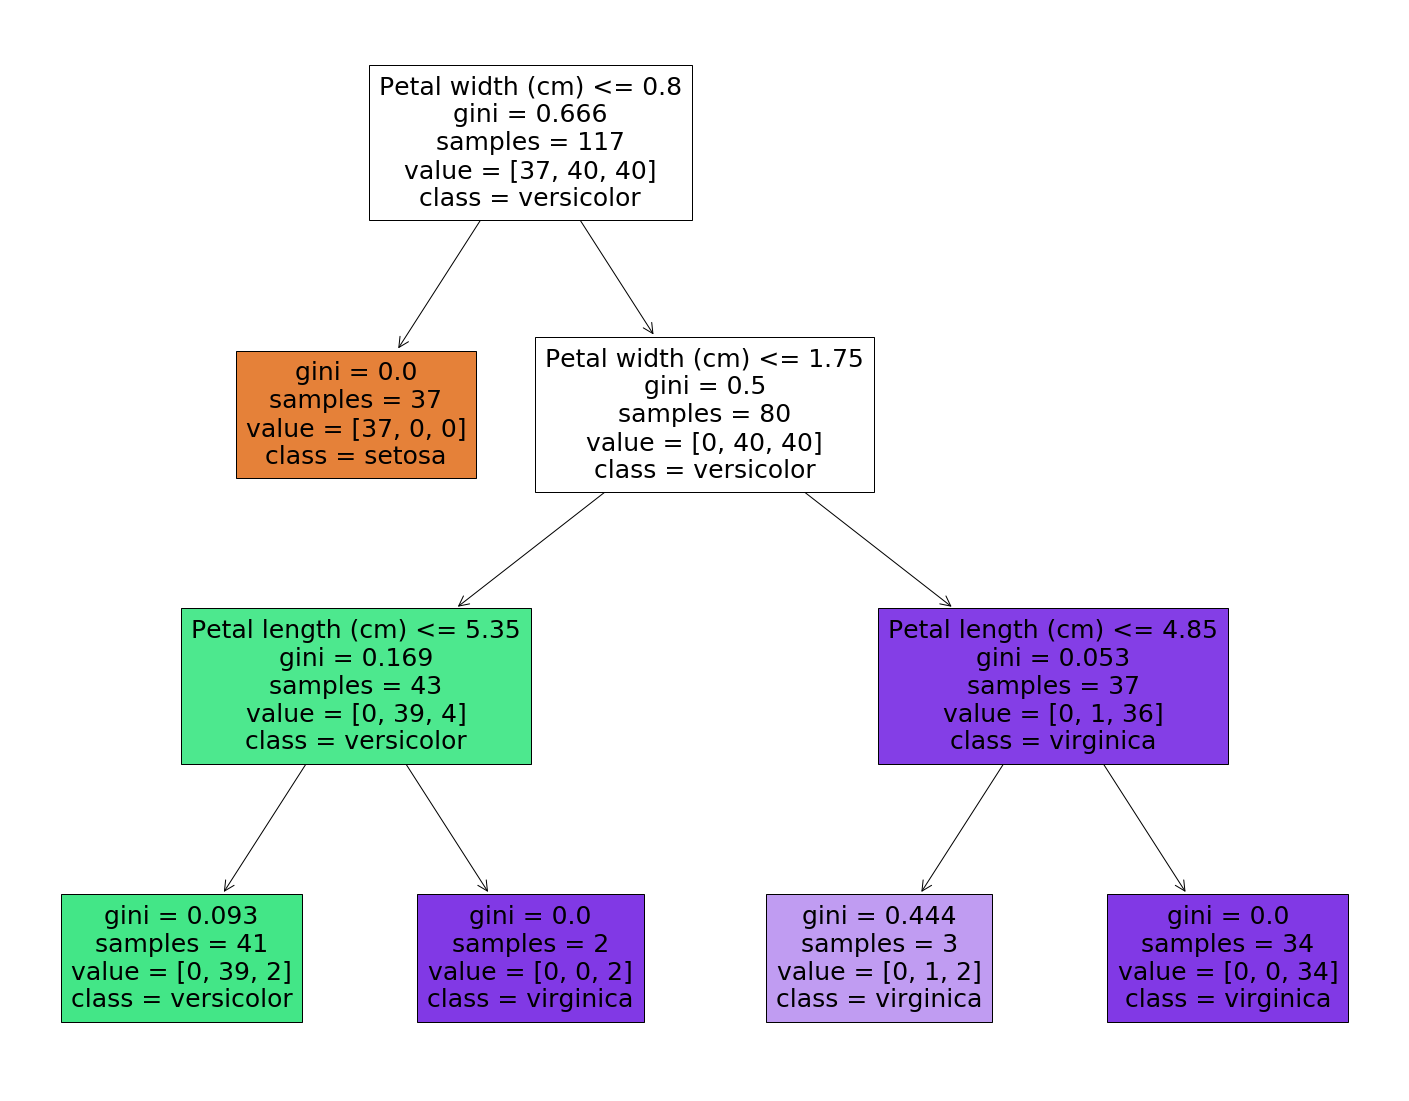

In [36]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=feature_names,class_names=class_names,filled=True)

**THANK YOU!**